# **Scraping Demographics of Nigeria data from the Wikipedia website**

In [60]:
import pandas as pd
import requests  # allow to open url access
from bs4 import BeautifulSoup as soup # html parser

In [61]:
url = 'https://en.wikipedia.org/wiki/Demographics_of_Nigeria'

In [62]:
response = requests.get(url)

page_soup = soup(response.content, 'html.parser')

In [63]:
tables = page_soup.find_all('table',{'class': 'wikitable'})

# display no of table
print(f'Number of wikitable tables found: {len(tables)}')

Number of wikitable tables found: 14


In [64]:
# Extract table of interest
table = tables[-2]

In [65]:
# Extract rows
rows = tables[-2].find_all('tr')


In [66]:
# Extract table headers
headers = [header.text.strip() for header in rows[0].find_all('th')]

headers

['Period',
 'Population per year',
 'Live births per year',
 'Deaths per year',
 'Natural change per year',
 'CBR*',
 'CDR*',
 'NC*',
 'TFR*',
 'IMR*']

In [67]:
# Extract data from rows (skip the header row)
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [col.get_text(strip=True) for col in cols]

    if len(cols) == len(headers):
      data.append(cols)


In [68]:
print(f"Data: {data[:5]}")  # Display first 5 rows for inspection

Data: [['1950', '36 836 000', '1,697,000', '1,010,000', '687,000', '45.6', '27.1', '18.5', '6.42', '184.0'], ['1951', '37 543 000', '1,731,000', '1,028,000', '702,000', '45.7', '27.1', '18.5', '6.42', '183.2'], ['1952', '38 263 000', '1,760,000', '1,044,000', '716,000', '45.6', '27.0', '18.5', '6.39', '181.6'], ['1953', '38 986 000', '1,797,000', '1,056,000', '741,000', '45.7', '26.8', '18.8', '6.40', '180.4'], ['1954', '39 710 000', '1,831,000', '1,074,000', '757 000', '45.7', '26.8', '18.9', '6.40', '179.0']]


In [69]:
# Create a DataFrame
demography = pd.DataFrame(data, columns=headers)

# Display the first few rows of the DataFrame
print(demography.head())

  Period Population per year Live births per year Deaths per year  \
0   1950          36 836 000            1,697,000       1,010,000   
1   1951          37 543 000            1,731,000       1,028,000   
2   1952          38 263 000            1,760,000       1,044,000   
3   1953          38 986 000            1,797,000       1,056,000   
4   1954          39 710 000            1,831,000       1,074,000   

  Natural change per year  CBR*  CDR*   NC*  TFR*   IMR*  
0                 687,000  45.6  27.1  18.5  6.42  184.0  
1                 702,000  45.7  27.1  18.5  6.42  183.2  
2                 716,000  45.6  27.0  18.5  6.39  181.6  
3                 741,000  45.7  26.8  18.8  6.40  180.4  
4                 757 000  45.7  26.8  18.9  6.40  179.0  


In [70]:
demography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Period                   74 non-null     object
 1   Population per year      74 non-null     object
 2   Live births per year     74 non-null     object
 3   Deaths per year          74 non-null     object
 4   Natural change per year  74 non-null     object
 5   CBR*                     74 non-null     object
 6   CDR*                     74 non-null     object
 7   NC*                      74 non-null     object
 8   TFR*                     74 non-null     object
 9   IMR*                     74 non-null     object
dtypes: object(10)
memory usage: 5.9+ KB


In [71]:
# Columns to convert
columns_to_convert = [
    'Period',
    'Population per year',
    'Live births per year',
    'Deaths per year',
    'Natural change per year',
    'CBR*',
    'CDR*',
    'NC*',
    'TFR*',
    'IMR*'
]

# Remove spaces and commas, then convert to numeric
for col in columns_to_convert:
    demography[col] = demography[col].replace({',': '', ' ': ''}, regex=True)  # Remove commas and spaces
    demography[col] = pd.to_numeric(demography[col], errors='coerce')  # Convert to numeric, coercing invalid to NaN

# Verify the updated DataFrame
print(demography.dtypes)
print(demography.head())


Period                       int64
Population per year          int64
Live births per year         int64
Deaths per year              int64
Natural change per year      int64
CBR*                       float64
CDR*                       float64
NC*                        float64
TFR*                       float64
IMR*                       float64
dtype: object
   Period  Population per year  Live births per year  Deaths per year  \
0    1950             36836000               1697000          1010000   
1    1951             37543000               1731000          1028000   
2    1952             38263000               1760000          1044000   
3    1953             38986000               1797000          1056000   
4    1954             39710000               1831000          1074000   

   Natural change per year  CBR*  CDR*   NC*  TFR*   IMR*  
0                   687000  45.6  27.1  18.5  6.42  184.0  
1                   702000  45.7  27.1  18.5  6.42  183.2  
2                

In [72]:
demography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Period                   74 non-null     int64  
 1   Population per year      74 non-null     int64  
 2   Live births per year     74 non-null     int64  
 3   Deaths per year          74 non-null     int64  
 4   Natural change per year  74 non-null     int64  
 5   CBR*                     74 non-null     float64
 6   CDR*                     74 non-null     float64
 7   NC*                      74 non-null     float64
 8   TFR*                     74 non-null     float64
 9   IMR*                     74 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 5.9 KB


In [73]:
# Filtering 21st Century (Period from 2000 onwards)

demography_21st = demography[demography['Period'] >= 2000]


In [74]:
demography_21st.head()

,Period,Population per year,Live births per year,Deaths per year,Natural change per year,CBR*,CDR*,NC*,TFR*,IMR*
50,2000,121235000,5345000,2146000,3199000,43.5,17.5,26.0,6.12,110.9
51,2001,124468000,5496000,2165000,3331000,43.6,17.2,26.4,6.14,108.1
52,2002,127837000,5645000,2192000,3453000,43.6,16.9,26.6,6.14,105.2
53,2003,131329000,5779000,2202000,3577000,43.4,16.5,26.9,6.12,102.3
54,2004,134910000,5902000,2225000,3676000,43.2,16.3,26.9,6.09,99.5


In [75]:
# Reset the index to start counting from 1
demography_21st.index = range(1, len(demography_21st) + 1)

In [76]:
demography_21st.head()

,Period,Population per year,Live births per year,Deaths per year,Natural change per year,CBR*,CDR*,NC*,TFR*,IMR*
1,2000,121235000,5345000,2146000,3199000,43.5,17.5,26.0,6.12,110.9
2,2001,124468000,5496000,2165000,3331000,43.6,17.2,26.4,6.14,108.1
3,2002,127837000,5645000,2192000,3453000,43.6,16.9,26.6,6.14,105.2
4,2003,131329000,5779000,2202000,3577000,43.4,16.5,26.9,6.12,102.3
5,2004,134910000,5902000,2225000,3676000,43.2,16.3,26.9,6.09,99.5


# **Population Growth**
## Objective: Understand the trend of population growth over the years.

In [77]:
# Annual growth rate

demography_21st.loc[:, 'Annual Growth Rate (%)'] = demography_21st['Population per year'].pct_change() * 100

<ipython-input-77-1daf276b1db9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demography_21st.loc[:, 'Annual Growth Rate (%)'] = demography_21st['Population per year'].pct_change() * 100


In [78]:
# Find years with highest and lowest growth rates
highest_growth = demography_21st.loc[demography_21st['Annual Growth Rate (%)'].idxmax()].round(2)
lowest_growth = demography_21st.loc[demography_21st['Annual Growth Rate (%)'].idxmin()].round(2)

print("Year with highest population growth:")
print(highest_growth[['Period', 'Annual Growth Rate (%)']])

print("Year with lowest population growth:")
print(lowest_growth[['Period', 'Annual Growth Rate (%)']])


Year with highest population growth:
Period                    2021.00
Annual Growth Rate (%)       6.19
Name: 22, dtype: float64
Year with lowest population growth:
Period                    2022.00
Annual Growth Rate (%)       2.12
Name: 23, dtype: float64


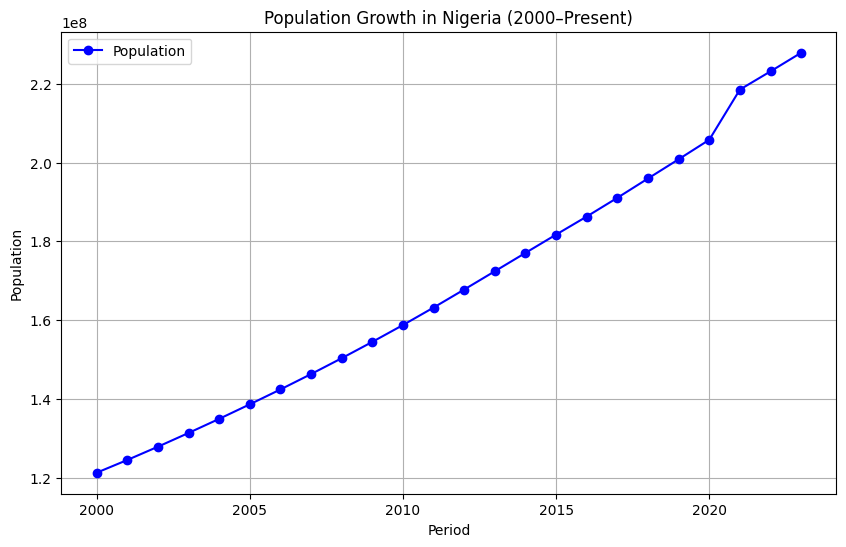

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(demography_21st['Period'], demography_21st['Population per year'], marker='o', color='blue', label='Population')
plt.title('Population Growth in Nigeria (2000–Present)')
plt.xlabel('Period')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.show()


# **Birth and Death Rates**
## Objective: analyze the trends in Crude Birth Rate (CBR) and Crude Death Rate (CDR) from 2000 onwards, compare their patterns over time, and understand the natural change (difference between birth and death rates).

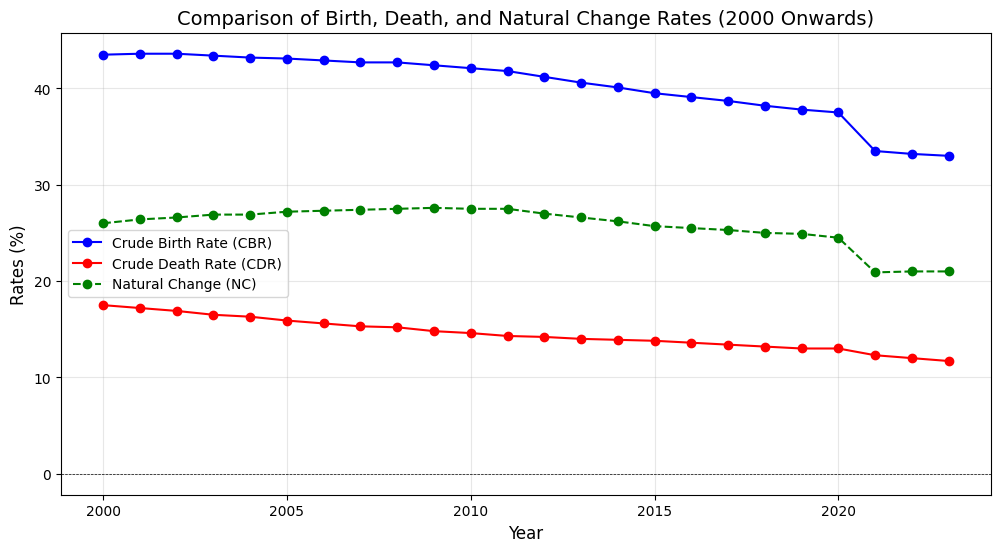

In [80]:
import matplotlib.pyplot as plt

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot the CBR, CDR, and Natural Change (NC)
plt.plot(demography_21st['Period'], demography_21st['CBR*'], marker='o', label='Crude Birth Rate (CBR)', color='blue')
plt.plot(demography_21st['Period'], demography_21st['CDR*'], marker='o', label='Crude Death Rate (CDR)', color='red')
plt.plot(demography_21st['Period'], demography_21st['NC*'], marker='o', label='Natural Change (NC)', color='green', linestyle='--')

# Adding plot labels and title
plt.title("Comparison of Birth, Death, and Natural Change Rates (2000 Onwards)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rates (%)", fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Horizontal line at y=0 for better comparison
plt.legend()

# Adding grid for readability
plt.grid(alpha=0.3)

# Show the plot
plt.show()


# **Total Fertility Rate (TFR) and Infant Mortality Rate (IMR)**
## Objective: Plot and compare the trends in TFR and IMR


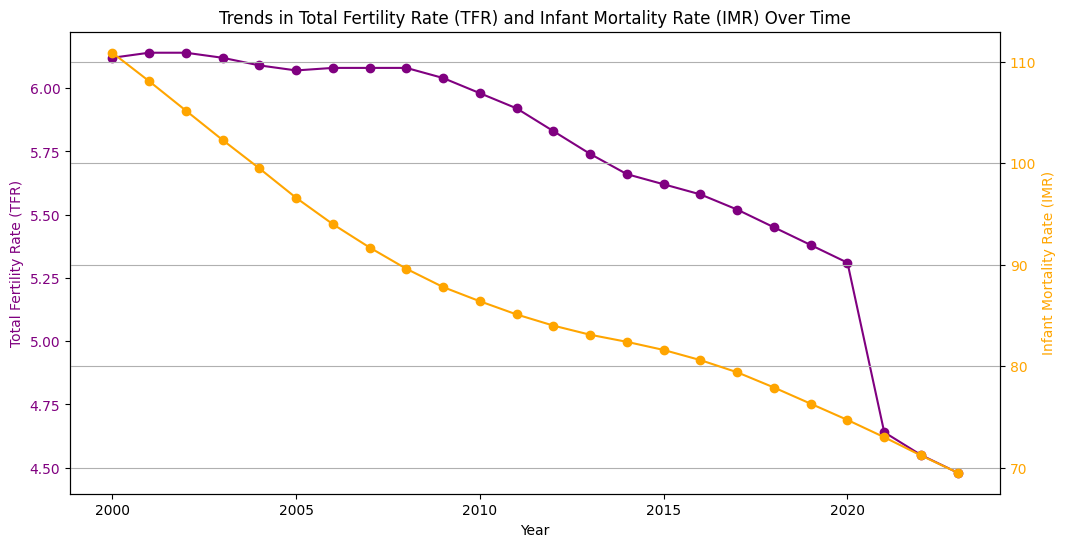

In [81]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot TFR
ax1.plot(demography_21st['Period'], demography_21st['TFR*'], color='purple', marker='o', label='Total Fertility Rate (TFR)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Fertility Rate (TFR)', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Create a second y-axis for IMR
ax2 = ax1.twinx()
ax2.plot(demography_21st['Period'], demography_21st['IMR*'], color='orange', marker='o', label='Infant Mortality Rate (IMR)')
ax2.set_ylabel('Infant Mortality Rate (IMR)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Trends in Total Fertility Rate (TFR) and Infant Mortality Rate (IMR) Over Time')
plt.grid(True)
plt.show()



# **Correlation Analysis**
## Objective: Evaluate the interrelationships between demographic variables to identify variables that strongly influence each other.

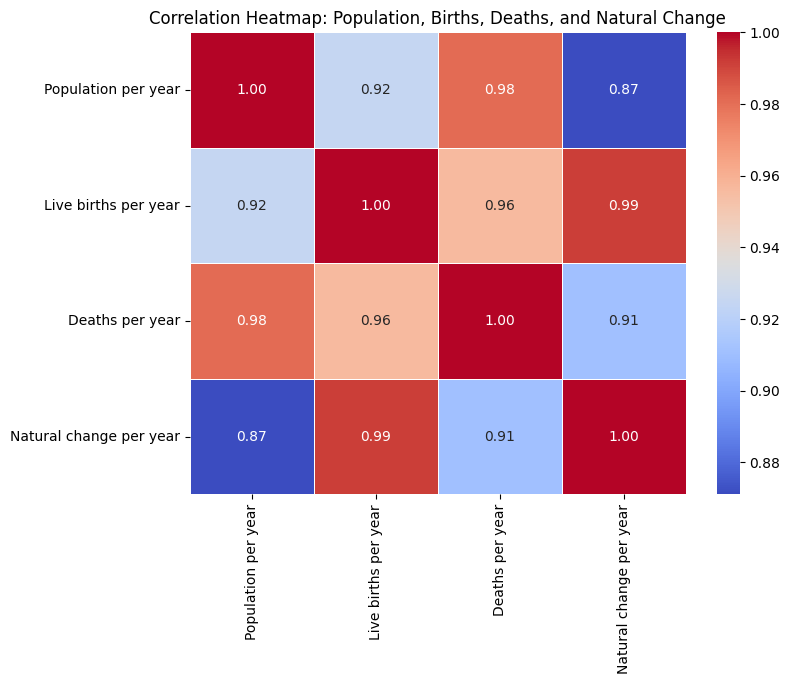

In [82]:

per_year = demography_21st[['Population per year', 'Live births per year', 'Deaths per year', 'Natural change per year']]

# Compute the correlation matrix
correlation_per_year = per_year.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_per_year, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Population, Births, Deaths, and Natural Change')
plt.show()



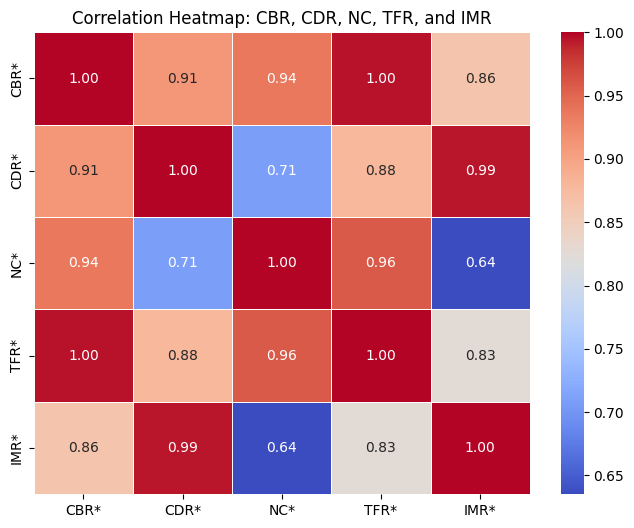

In [83]:
rates = demography_21st[['CBR*', 'CDR*', 'NC*', 'TFR*', 'IMR*']]

# Compute the correlation matrix
correlation_rates = rates.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_rates, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: CBR, CDR, NC, TFR, and IMR')
plt.show()